In [1]:
#Import our standard libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#suppress warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
#Load Clearned Dataset
fname = "UniversalBank.csv"
df = pd.read_csv(fname) 

In [4]:
df.drop(columns = ['ID','ZIP Code'], inplace = True)

In [5]:
df.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,45,19,34,3,1.5,1,0,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,0,1


In [6]:
X = df.drop(columns=['Personal Loan'])
y = df['Personal Loan']

In [7]:
df.groupby('Personal Loan')['Personal Loan'].count()

Personal Loan
0    4520
1     480
Name: Personal Loan, dtype: int64

In [8]:
# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1)

In [9]:
#Decision Trees
from sklearn.tree import DecisionTreeClassifier,export_text, plot_tree

In [10]:
#Full Grown tree
fulltree = DecisionTreeClassifier(random_state = 0)
fulltree.fit(X_train,y_train)

DecisionTreeClassifier(random_state=0)

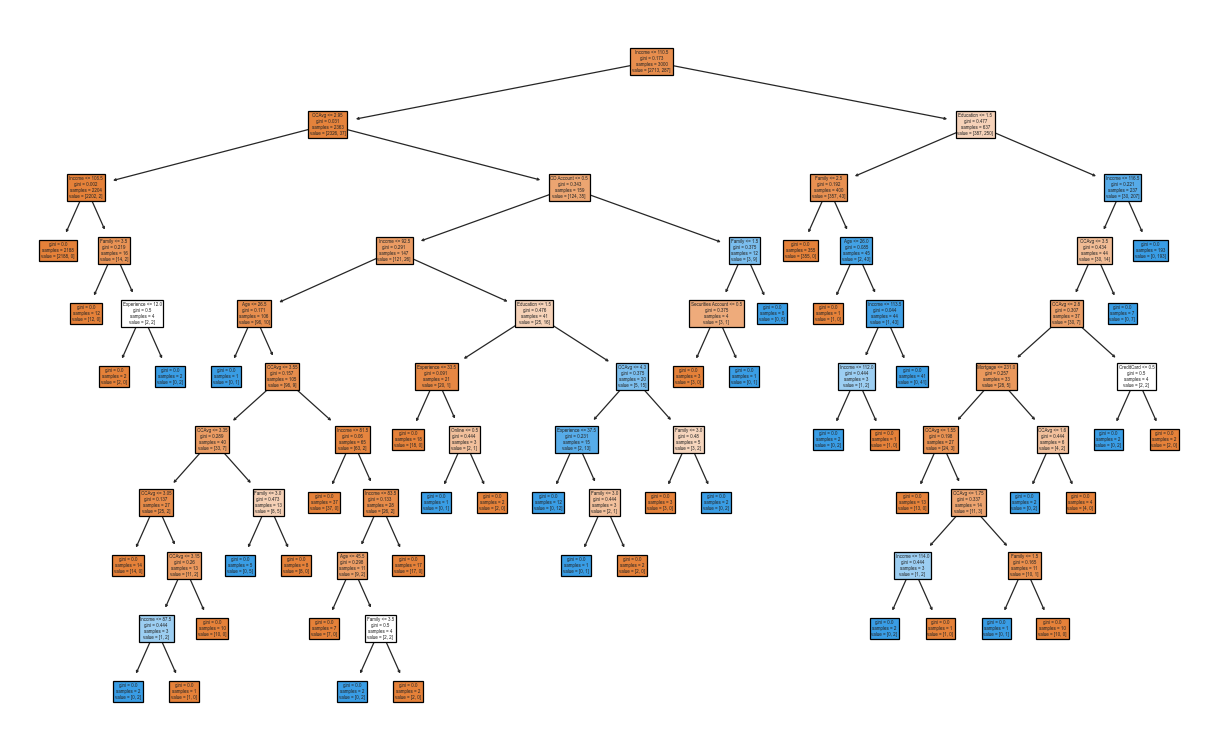

In [11]:

plt.style.use('seaborn')
fig = plt.figure(figsize=(5,3), dpi = 300)
_ = plot_tree(fulltree, 
                   feature_names=X.columns,  
                   #class_names=['No More', 'Survived'],
                   filled=True)
plt.show()

In [12]:
# Accuracy Score
from sklearn.metrics import accuracy_score
print(accuracy_score(y_train,fulltree.predict(X_train)))
print(accuracy_score(y_test,fulltree.predict(X_test)))

1.0
0.98


In [13]:
#Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_train,fulltree.predict(X_train))
print('Training Confusion matrix\n\n', cm)

cm = confusion_matrix(y_test,fulltree.predict(X_test))
print('Test Confusion matrix\n\n', cm)

Training Confusion matrix

 [[2713    0]
 [   0  287]]
Test Confusion matrix

 [[1790   17]
 [  23  170]]


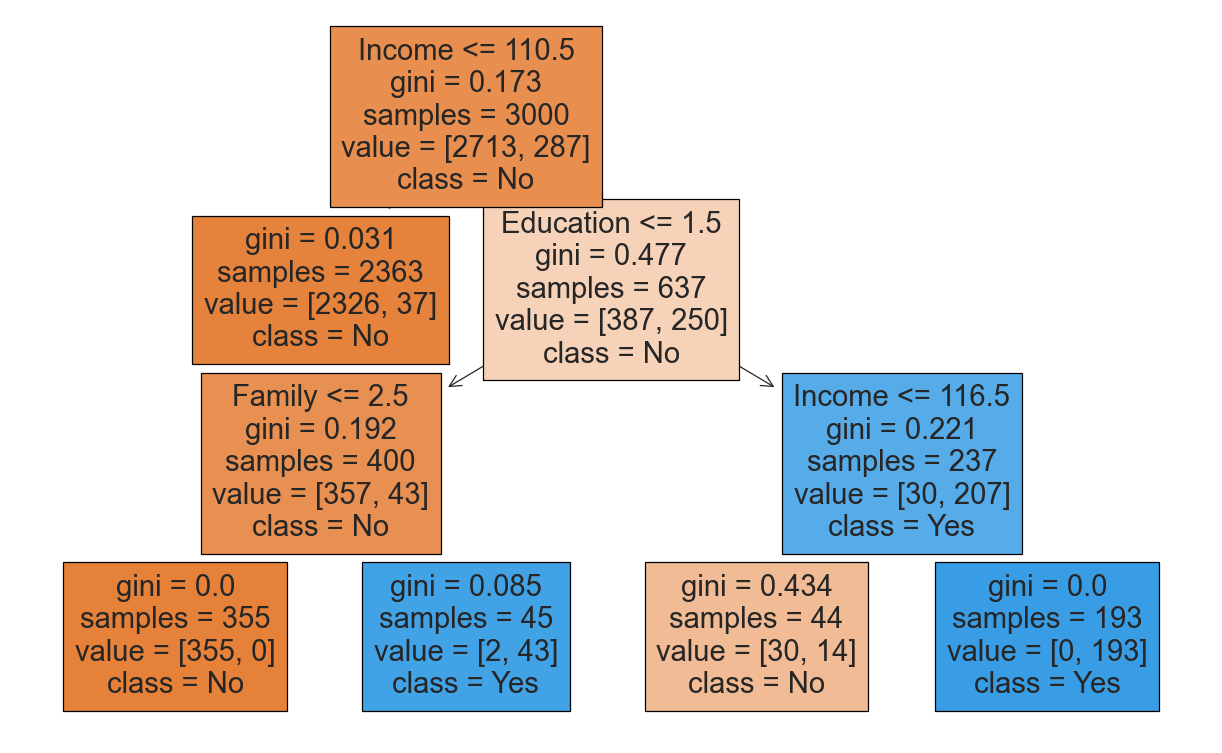

In [14]:
#Avoiding Overfitting
smallCtree = DecisionTreeClassifier(max_depth = 30, min_samples_split = 20, 
                                    min_impurity_decrease = 0.01, random_state = 0)
smallCtree.fit(X_train,y_train)
##plotDecisionTree(fulltree, feature_names = X_train.columns)

plt.style.use('seaborn')
fig = plt.figure(figsize=(5,3), dpi = 300)
_ = plot_tree(smallCtree, 
                   feature_names=X.columns,  
                   class_names=['No', 'Yes'],
                   filled=True)
plt.show()

In [15]:

print(accuracy_score(y_train,smallCtree.predict(X_train)))
cm = confusion_matrix(y_train,smallCtree.predict(X_train))
print('Training Confusion matrix\n\n', cm)

print(accuracy_score(y_test,smallCtree.predict(X_test)))
cm = confusion_matrix(y_test,smallCtree.predict(X_test))
print('Test Confusion matrix\n\n', cm)

0.9823333333333333
Training Confusion matrix

 [[2711    2]
 [  51  236]]
0.977
Test Confusion matrix

 [[1804    3]
 [  43  150]]


In [16]:
from sklearn.model_selection import cross_val_score, GridSearchCV

In [17]:
#start with an initial guess for params
param_grid = {
    'max_depth': [10,20,30, 40],
    'min_samples_split': [20,40,60,80,100],
    'min_impurity_decrease': [0, 0.0005, 0.001, 0.005, 0.01]
}
gridsearch = GridSearchCV(DecisionTreeClassifier(random_state = 1),
                         param_grid,
                         cv = 5,
                         n_jobs = -1)
gridsearch.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=1), n_jobs=-1,
             param_grid={'max_depth': [10, 20, 30, 40],
                         'min_impurity_decrease': [0, 0.0005, 0.001, 0.005,
                                                   0.01],
                         'min_samples_split': [20, 40, 60, 80, 100]})

In [18]:
print('Initial score:', gridsearch.best_score_)
print('Initial parameters:', gridsearch.best_params_)

Initial score: 0.9876666666666667
Initial parameters: {'max_depth': 10, 'min_impurity_decrease': 0.0005, 'min_samples_split': 20}


In [19]:
#adopt the params
param_grid = {
    'max_depth': list(range(2,16)),
    'min_samples_split': list(range(10,22)),
    'min_impurity_decrease': [0, 0.0005, 0.001, 0.005, 0.01]
}

gridsearch = GridSearchCV(DecisionTreeClassifier(random_state = 1),
                         param_grid,
                         cv = 5,
                         n_jobs = -1)
gridsearch.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=1), n_jobs=-1,
             param_grid={'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,
                                       14, 15],
                         'min_impurity_decrease': [0, 0.0005, 0.001, 0.005,
                                                   0.01],
                         'min_samples_split': [10, 11, 12, 13, 14, 15, 16, 17,
                                               18, 19, 20, 21]})

In [20]:
print('Initial score:', gridsearch.best_score_)
print('Initial parameters:', gridsearch.best_params_)

Initial score: 0.9883333333333333
Initial parameters: {'max_depth': 5, 'min_impurity_decrease': 0, 'min_samples_split': 20}


In [21]:
bestCtree = gridsearch.best_estimator_

In [22]:

print(accuracy_score(y_train,bestCtree.predict(X_train)))
cm = confusion_matrix(y_train,bestCtree.predict(X_train))
print('Training Confusion matrix\n\n', cm)

print("\nTesting Accuracy")
print(accuracy_score(y_test,bestCtree.predict(X_test)))
cm = confusion_matrix(y_test,bestCtree.predict(X_test))
print('Test Confusion matrix\n\n', cm)

0.9906666666666667
Training Confusion matrix

 [[2704    9]
 [  19  268]]

Testing Accuracy
0.9825
Test Confusion matrix

 [[1793   14]
 [  21  172]]


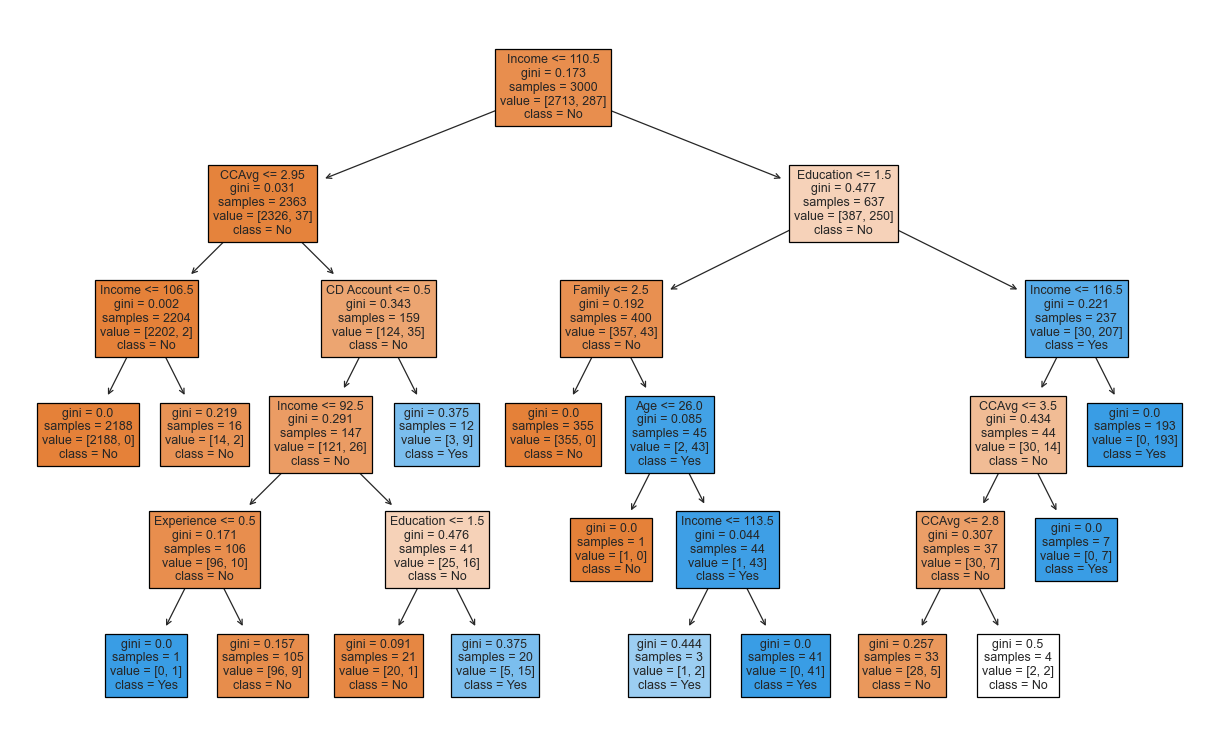

In [23]:

plt.style.use('seaborn')
fig = plt.figure(figsize=(5,3), dpi = 300)
_ = plot_tree(bestCtree, 
                   feature_names=X.columns,  
                   class_names=['No', 'Yes'],
                   filled=True)
plt.show()